## Logisztikus regresszió az írisz adathalmazon

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
import numpy as np
warnings.filterwarnings("ignore")

### Adatok betöltése

In [2]:
iris = datasets.load_iris() # adatok betöltése
X = iris["data"][:, 3:]  # szirom szélesség
y = (iris["target"] == 2).astype(np.int)

### A modell tanítása

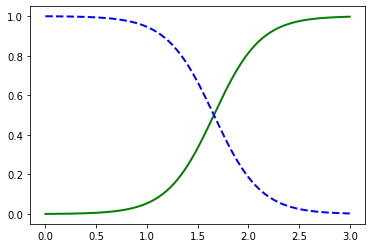

In [3]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42) # Logisztikus regresszor
log_reg.fit(X, y) # a tanítás eljárása
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # lin. tér a fggvénynek
y_proba = log_reg.predict_proba(X_new) # predikció eljárása

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Nem Iris virginica")

### A modell értelmezése

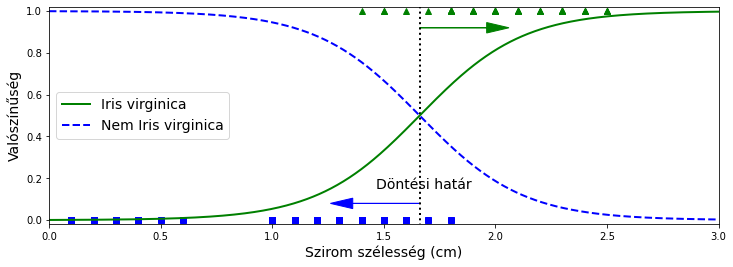

In [4]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Nem Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Döntési határ", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Szirom szélesség (cm)", fontsize=14)
plt.ylabel("Valószínűség", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

### 2-dimenziós döntési határok

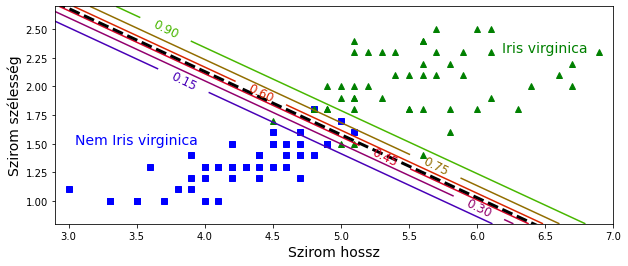

In [5]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Nem Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Szirom hossz", fontsize=14)
plt.ylabel("Szirom szélesség", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax regresszió

In [6]:
X = iris["data"][:, (2, 3)]  # szirom hossz, szirom szélesség
y = iris["target"] # célváltozó

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y) # tanítás

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

### Predikció a tér minden pontjára

In [7]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),np.linspace(0, 3.5, 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

In [8]:
y_proba

array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
       [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
       [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
       ...,
       [7.73770362e-23, 1.03687990e-11, 1.00000000e+00],
       [6.69680312e-23, 9.68354416e-12, 1.00000000e+00],
       [5.79592787e-23, 9.04357657e-12, 1.00000000e+00]])

In [9]:
y_predict

array([0, 0, 0, ..., 2, 2, 2])

### Softmax modell ábrázolása

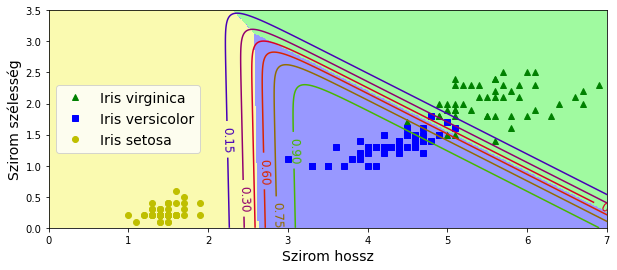

In [10]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Szirom hossz", fontsize=14)
plt.ylabel("Szirom szélesség", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])

print('Accuracy:', float(accuracy_score(actual_labels, pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))